# Regression and Classification Model Comparator

This Python project is designed to compare the performance of various regression and classification models on a given dataset. It provides a streamlined workflow for data preprocessing, exploratory data analysis (EDA), model training, hyperparameter tuning, and evaluation.

Features

Data Preprocessing: Handles missing values, removes duplicates, performs label encoding for categorical features, and scales numerical features.

Exploratory Data Analysis (EDA):

Identifies and visualizes outliers.

Generates a correlation heatmap.

Model Training and Evaluation:

Supports a wide range of regression and classification models.

Automatically applies hyperparameter tuning where applicable.

Evaluates models using appropriate metrics based on the task type (regression or classification).

Results:

Displays model performance in tabular format.

Identifies and outputs the best-performing model.

Supported Models

Regression Models:

Linear Regression

Ridge Regression

Lasso Regression

ElasticNet Regression

Random Forest Regressor

Gradient Boosting Regressor

OLS (Ordinary Least Squares)

Support Vector Regression (SVR)

Classification Models:

Gaussian Naive Bayes

Multinomial Naive Bayes

Getting Started

Prerequisites

Ensure you have Python installed along with the required libraries. You can install the necessary dependencies using the following command:

pip install pandas numpy seaborn matplotlib scikit-learn statsmodels pyearth

Usage

Clone the repository:

git clone <repository_url>
cd <repository_folder>

Prepare your dataset:

Ensure your dataset is in CSV format.

Specify the target column name.

Run the script:

python <script_name>.py

Provide inputs when prompted:

File path: Path to your CSV dataset.

Target column: Name of the column to predict.

Task type: Either regression or classification.

Example

Enter the file path: data.csv
Enter the target column: price
Enter the task type (regression/classification): regression

Results

A detailed analysis is displayed, including model performance metrics (e.g., MSE, R², or Accuracy).

The best-performing model is highlighted.

File Structure

main.py: Main script for running the project.

data/: Folder to store datasets.

results/: Folder to store outputs (if implemented).

Contributing

Contributions are welcome! Feel free to fork the repository and submit a pull request.

License

This project is licensed under the MIT License. See the LICENSE file for details.



<ipython-input-5-58b0269773e1>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = imputer_numeric.fit_transform(df[[target_col]])


Outliers:

Outlier Counts:
      Column  Outlier Count
0        age              0
1        sex              0
2         cp              0
3   trestbps              9
4       chol              5
5        fbs             45
6    restecg              0
7    thalach              1
8      exang              0
9    oldpeak              5
10     slope              0
11        ca             24
12      thal              2
13    target              0


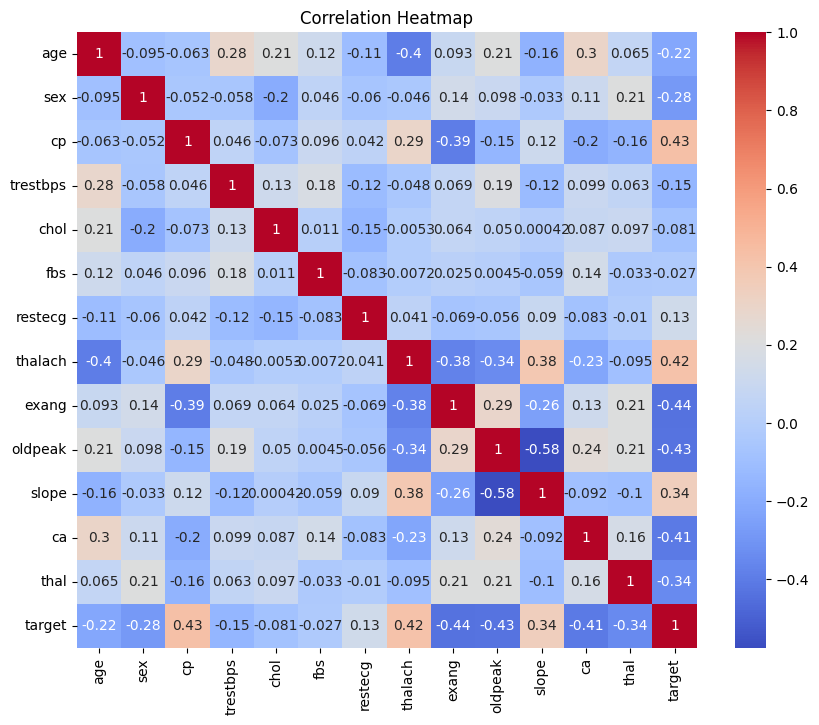


Fluctuations with respect to independent variables:


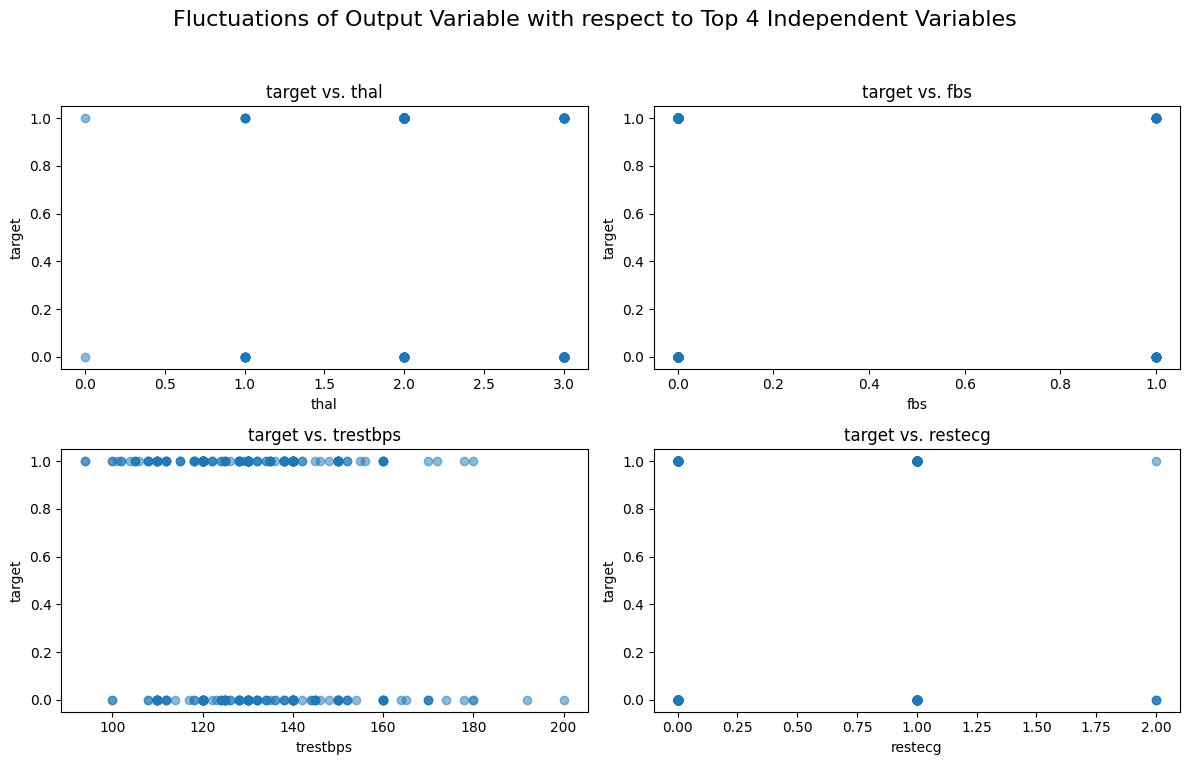

Training Linear Regression...
Skipping Linear Regression - not suitable for classification task.
Training Ridge Regression...
Skipping Ridge Regression - not suitable for classification task.
Training Lasso Regression...
Skipping Lasso Regression - not suitable for classification task.
Training ElasticNet Regression...
Skipping ElasticNet Regression - not suitable for classification task.
Training OLS...
Skipping OLS - not suitable for classification task.
Training Gaussian Naive Bayes...
Gaussian Naive Bayes: Accuracy = 0.8852
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89        29
         1.0       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Training Bernoulli Naive Bayes...
Bernoulli Naive Bayes: Accuracy = 0.8689
              precision    recall  f1-score   support

         

In [ ]:
#@title All reg/classification model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVR
from statsmodels.api import OLS

# Define all regression and classification models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "OLS": None,  # Placeholder for OLS (handled differently due to statsmodels)
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Regression (SVR)": SVR()
}

# Define hyperparameters for models
param_grids = {
    "Ridge Regression": {"alpha": [0.1, 1, 10]},
    "Lasso Regression": {"alpha": [0.1, 1, 10]},
    "ElasticNet Regression": {"alpha": [0.1, 1, 10], "l1_ratio": [0.1, 0.5, 0.9]},
    "Random Forest Regressor": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
    "Gradient Boosting Regressor": {"learning_rate": [0.01, 0.1], "n_estimators": [100, 200]},
    "Support Vector Regression (SVR)": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
}

def load_data(file_path):
    return pd.read_csv(file_path)

def preprocess_data(df):
    # Handle missing values for numeric and categorical features separately
    numeric_features = df.select_dtypes(include=[np.number]).columns
    categorical_features = df.select_dtypes(include=['object']).columns

    # Impute missing values for numeric features with mean
    imputer_numeric = SimpleImputer(strategy="mean")
    df[numeric_features] = imputer_numeric.fit_transform(df[numeric_features])

    # Impute missing values for categorical features with most frequent value
    # Check if there are categorical features before applying SimpleImputer
    if len(categorical_features) > 0:  # This line is added for the fix
        imputer_categorical = SimpleImputer(strategy="most_frequent")
        df[categorical_features] = imputer_categorical.fit_transform(df[categorical_features])

    # Remove duplicates
    df = df.drop_duplicates()

    # Encode categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Ensure target variable is binary (0 or 1)
    # This will convert any non-binary values to NaN,
    # which will be handled by SimpleImputer later
    #df[target_col] = df[target_col].map({0: 0, 1: 1})
    # Instead, handle missing values in the target variable
    # using the numeric imputer (or a dedicated one for the target)
    df[target_col] = imputer_numeric.fit_transform(df[[target_col]])

    return df, label_encoders

def eda(df):
    # Check for outliers
    print("Outliers:")
    outlier_columns = []
    # Check for outliers and store counts in a dictionary
    outlier_counts = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    # Create a DataFrame from the outlier counts
    outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=["Column", "Outlier Count"])
    print("\nOutlier Counts:")
    print(outlier_df)

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

    # Fluctuations with respect to independent variables
    print("\nFluctuations with respect to independent variables:")
    # Calculate variance of output variable with respect to each independent variable
    variances = {}
    for col in df.drop(columns=[target_col]).select_dtypes(include=[np.number]).columns:
        # Calculate variance for each group and store as a single value
        variances[col] = df.groupby(col)[target_col].var().mean()

    # Select top 4 independent variables with maximum variance
    top_4_vars = sorted(variances, key=variances.get, reverse=True)[:4]

    # Create 2x2 plot
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Fluctuations of Output Variable with respect to Top 4 Independent Variables", fontsize=16)

    for i, var in enumerate(top_4_vars):
        row = i // 2
        col = i % 2
        axes[row, col].scatter(df[var], df[target_col], alpha=0.5)
        axes[row, col].set_xlabel(var)
        axes[row, col].set_ylabel(target_col)
        axes[row, col].set_title(f"{target_col} vs. {var}")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for suptitle
    plt.show()

def split_data(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Ensure no negative values for MultinomialNB compatibility
    if "Multinomial Naive Bayes" in models:
        if (X < 0).any().any():
            print("Transforming negative values in dataset to ensure compatibility with MultinomialNB.")
            X = X - X.min().min()

    return train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_test, y_test, task_type):
    predictions = model.predict(X_test)
    if task_type == "regression":
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        return mse, r2
    elif task_type == "classification":
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions, zero_division=0)
        return accuracy, report

def apply_models(X_train, X_test, y_train, y_test, task_type):
    best_model = None
    best_score = -np.inf
    results = []  # To store performance of all models

    for name, model in models.items():
        print(f"Training {name}...")

        # Check if the model is suitable for the task type
        is_regression_model = name in ["Linear Regression", "Ridge Regression", "Lasso Regression",
                                       "ElasticNet Regression", "Random Forest Regressor",
                                       "Gradient Boosting Regressor", "OLS", "Support Vector Regression (SVR)"]

        if (task_type == "classification" and is_regression_model) or \
           (task_type == "regression" and name in ["Naive Bayes", "Multinomial Naive Bayes"]):
            print(f"Skipping {name} - not suitable for {task_type} task.")
            continue

        # Handle OLS separately (statsmodels)
        if name == "OLS" and task_type == "regression":
            X_train_const = np.c_[np.ones(X_train.shape[0]), X_train]
            X_test_const = np.c_[np.ones(X_test.shape[0]), X_test]
            ols_model = OLS(y_train, X_train_const).fit()
            predictions = ols_model.predict(X_test_const)
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}")
            results.append([name, mse, r2])

            if r2 > best_score:
                best_score = r2
                best_model = ols_model
            continue

        # Ensure no negative values for MultinomialNB compatibility *AFTER* SCALING
        if name == "Multinomial Naive Bayes":
            if (X_train < 0).any().any():
                print("Transforming negative values in training data to ensure compatibility with MultinomialNB.")
                X_train = X_train - X_train.min().min()
            if (X_test < 0).any().any():
                print("Transforming negative values in test data to ensure compatibility with MultinomialNB.")
                X_test = X_test - X_test.min().min()

        # Perform hyperparameter tuning if applicable
        if name in param_grids:
            grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring="r2" if task_type == "regression" else "accuracy")
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_

        else:
            model.fit(X_train, y_train)

        # Evaluate the model
        if task_type == "regression":
            mse, r2 = evaluate_model(model, X_test, y_test, task_type)
            print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}")
            results.append([name, mse, r2])
            if r2 > best_score:
                best_score = r2
                best_model = model
        elif task_type == "classification":
            accuracy, report = evaluate_model(model, X_test, y_test, task_type)
            print(f"{name}: Accuracy = {accuracy:.4f}\n{report}")
            results.append([name, accuracy])
            if accuracy > best_score:
                best_score = accuracy
                best_model = model

    # Display results in tabular format
    if task_type == "regression":
        results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2"])
    elif task_type == "classification":
        results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
    print("\nModel Performance:")
    print(results_df)

    return best_model

def main(file_path, target_col, task_type):
    # Load data
    df = load_data(file_path)

    # Preprocess data
    df, label_encoders = preprocess_data(df)

    # Perform EDA
    eda(df)

    # Split data
    X_train, X_test, y_train, y_test = split_data(df, target_col)

    # Scale data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Apply models
    best_model = apply_models(X_train, X_test, y_train, y_test, task_type)

    print("Best Model:", best_model)
    return best_model

if __name__ == "__main__":
    # Example usage
    file_path = "/content/heart (2).csv"  # Replace with your dataset path
    target_col = "target"  # Replace with your target column name
    task_type = "classification"  # regression/classification
    best_model = main(file_path, target_col, task_type)


Outliers:

Outlier Counts:
                  Column  Outlier Count
0                     id              0
1                    Age              0
2                 Gender              0
3          Annual Income          70466
4         Marital Status              0
5   Number of Dependents              0
6        Education Level              0
7             Occupation              0
8           Health Score              0
9               Location              0
10           Policy Type              0
11       Previous Claims          62066
12           Vehicle Age              0
13          Credit Score              0
14    Insurance Duration              0
15     Policy Start Date              0
16     Customer Feedback              0
17        Smoking Status              0
18    Exercise Frequency              0
19         Property Type              0
20        Premium Amount          49320


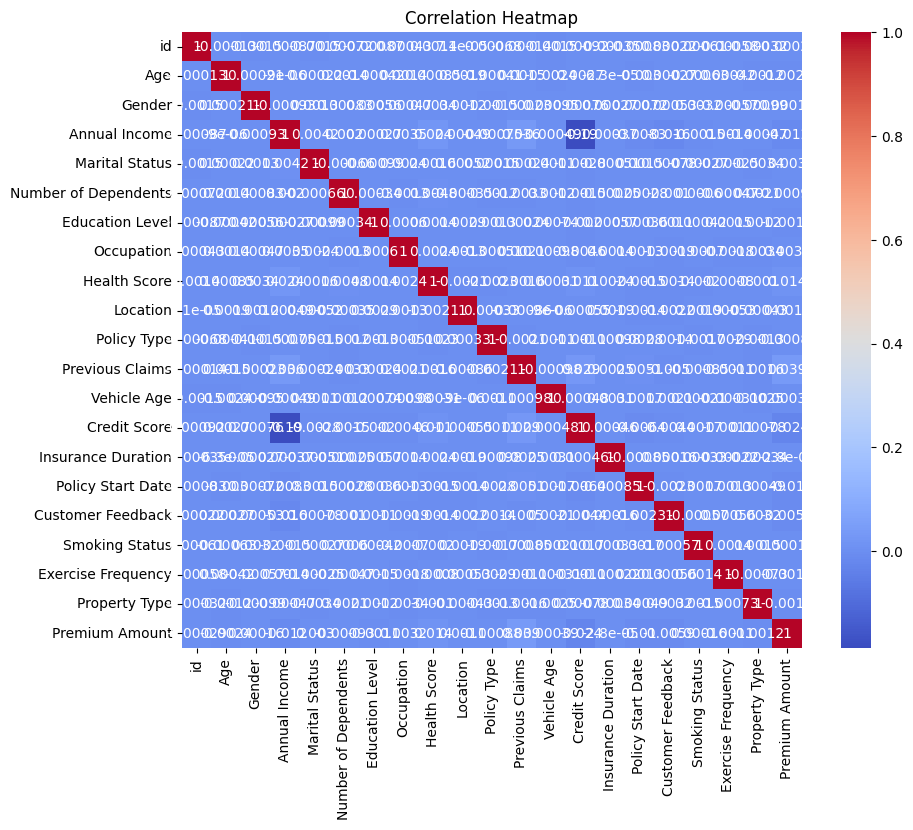


Fluctuations with respect to independent variables:


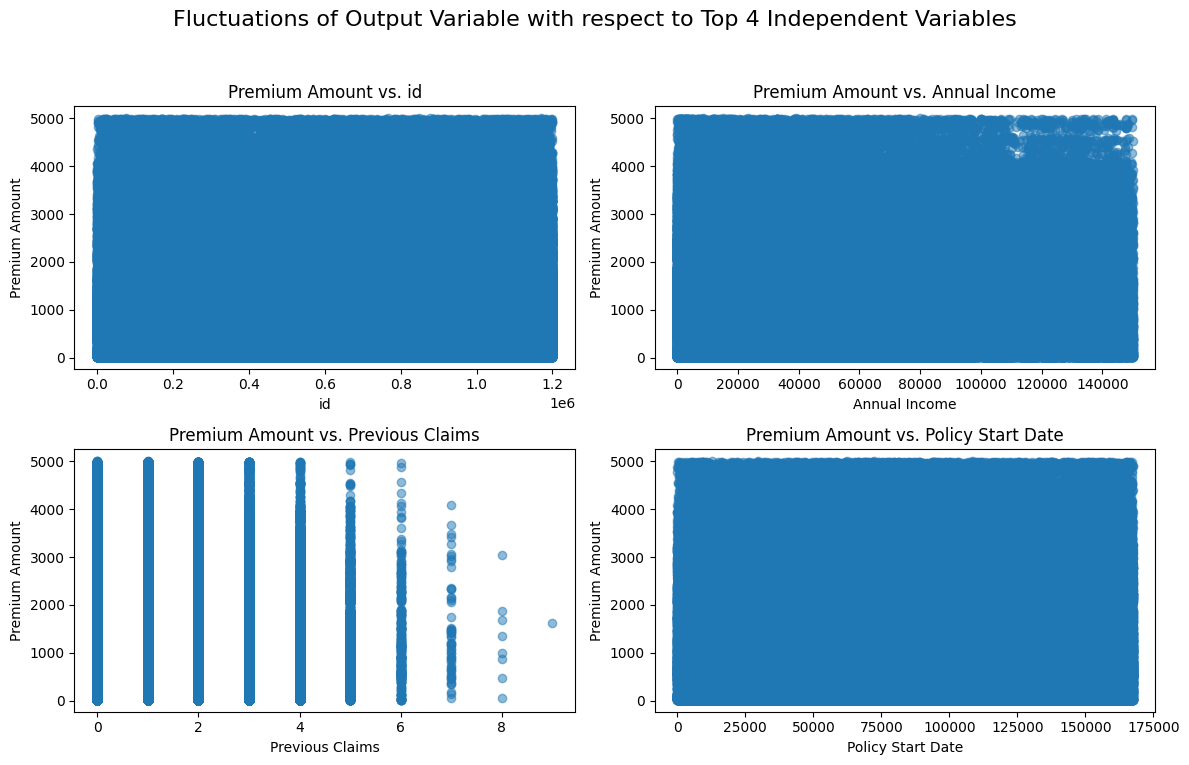

Training Linear Regression...
Linear Regression: MSE = 745189.0944, R2 = 0.0028
Training Ridge Regression...
Ridge Regression: MSE = 745189.0937, R2 = 0.0028
Training Lasso Regression...
Lasso Regression: MSE = 745180.9883, R2 = 0.0028
Training ElasticNet Regression...
ElasticNet Regression: MSE = 745186.2093, R2 = 0.0028
Training OLS...
OLS: MSE = 745189.0944, R2 = 0.0028
Training Gaussian Naive Bayes...
Gaussian Naive Bayes: MSE = 10309288.5232, R2 = -12.7956
Training Bernoulli Naive Bayes...
Bernoulli Naive Bayes: MSE = 1889874.2254, R2 = -1.5290
Training Multinomial Naive Bayes...
Skipping Multinomial Naive Bayes - not suitable for regression task.
Training Support Vector Regression (SVR)...


In [ ]:
file_path = "/content/train.csv"
target_col = "Premium Amount"  # target column name
task_type = "regression"  # regression/classification
best_model = main(file_path, target_col, task_type)